In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def mean(values):
    return sum(values)/float(len(values))

def variance(values,mean):
    return sum([(x-mean)**2 for x in values])

def covariance(x_train,mean_x,y_train,mean_y):
    return sum([(x_train[i]-mean_x)*(y_train[i]-mean_y) for i in range(len(x_train))])

def lin_reg(trainset,testset,b0,b1,x_test,y_test):
    y_prediction=list()
    for x in x_test:
        hypothesis=b0+(b1*x)
        y_prediction.append(hypothesis)
    return y_prediction

trainset = pd.read_csv(r"/content/3.train.csv")
x_train=trainset.iloc[:, 0].values
y_train=trainset.iloc[:, 1].values

mean_x,mean_y=mean(x_train),mean(y_train)
var_x,var_y=variance(x_train,mean_x),variance(y_train,mean_y)

print('x-stats: ','mean=',mean_x,'variance=',var_x)
print('y-stats: ','mean=',mean_y,'variance=',var_y)

covar=covariance(x_train,mean_x,y_train,mean_y)
print('covariance=',covar)

#hypothesis function b0+b1*x
b1=covar/var_x
b0=mean_y-(b1*mean_x)
print('b1=',b1)
print('b0=',b0)

testset = pd.read_csv(r"/content/3.test.csv")
x_test=testset.iloc[:, 0].values
y_test=testset.iloc[:, 1].values

y_prediction=lin_reg(trainset,testset,b0,b1,x_test,y_test)

x-stats:  mean= 49.99285714285714 variance= 585404.9642857142
y-stats:  mean= 49.91160845617139 variance= 591838.6593366332
covariance= 585860.5545756883
b1= 1.0007782480808478
b0= -0.12015553181327476


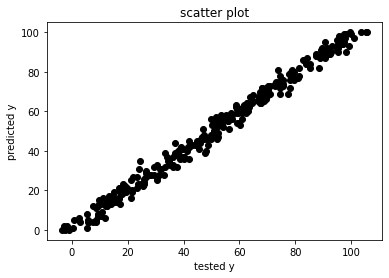

In [13]:
plt.scatter(y_test,y_prediction,color='black')
plt.title('scatter plot')
plt.xlabel('tested y')
plt.ylabel('predicted y')
plt.show()

### *mean absolute error*

In [14]:
MAE = (np.abs(np.subtract(y_test, y_prediction))).mean()
print('mean absolute error: ',MAE)

mean absolute error:  2.4158414585501435


### *mean squared error*

In [15]:
MSE = np.square(np.subtract(y_test, y_prediction)).mean() 
print('mean squared error: ',MSE)

mean squared error:  9.434852832251481


### *root-mean squared error*

In [16]:
RMSE=np.sqrt(MSE)
print('root mean squared error: ',RMSE)

root mean squared error:  3.071620554731896


In [17]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_prediction})
data

,Actual,Predicted
0,79.775152,76.939770
1,23.177279,20.896188
2,25.609262,21.896966
3,17.857388,19.895409
4,41.849864,35.907861
...,...,...
295,68.545888,70.935100
296,47.334876,45.915644
297,54.090637,54.922648
298,63.297171,61.928096


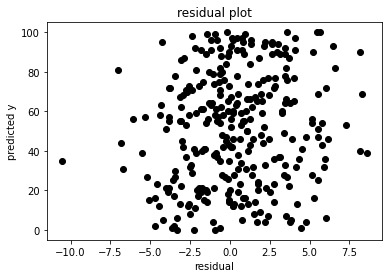

In [18]:
residual = y_test-y_prediction
plt.scatter(residual,y_prediction,color='black')
plt.title('residual plot')
plt.xlabel('residual')
plt.ylabel('predicted y')
plt.show()